In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense


In [2]:
# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
# Define the ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

In [5]:
# Fit the data generator to the training data
datagen.fit(x_train)

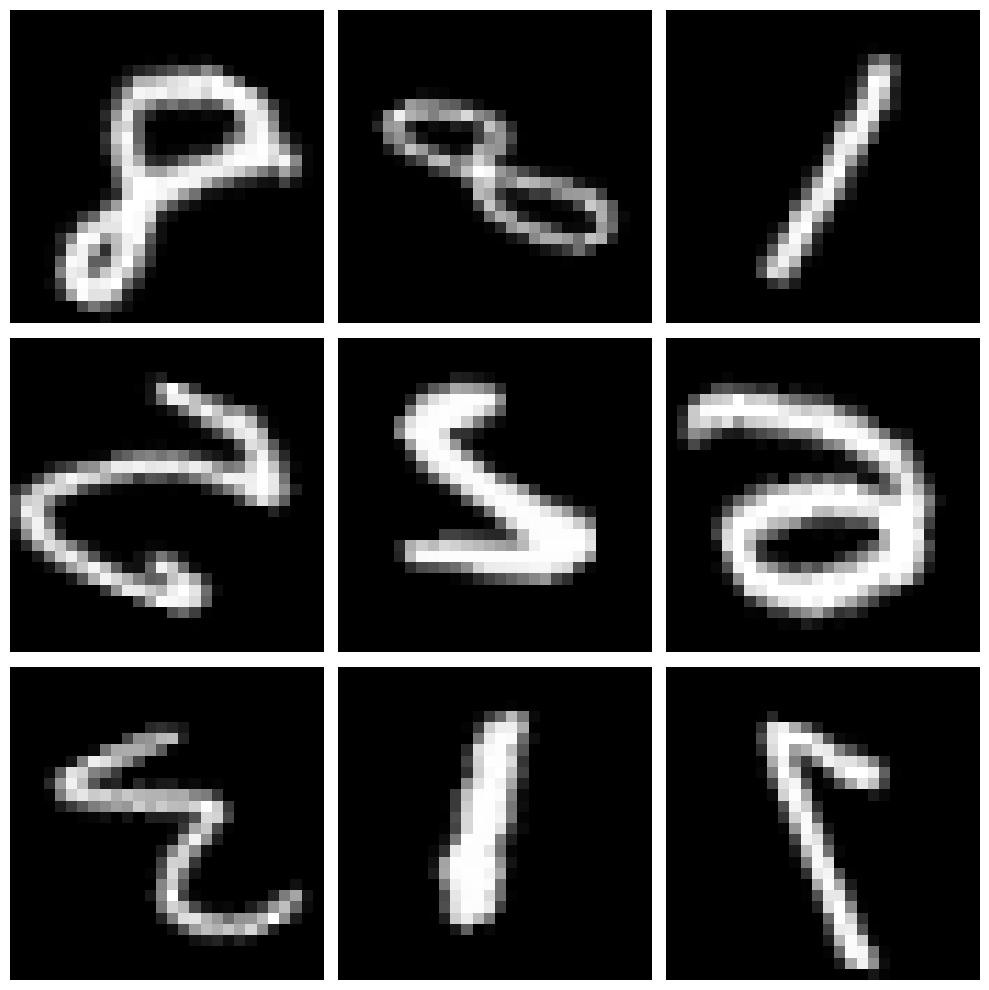

In [6]:

# Display some augmented images
def plot_augmented_images(datagen, images):
    augmented_images = [next(datagen.flow(images, batch_size=1)) for _ in range(9)]
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.flatten()
    for img, ax in zip(augmented_images, axes):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
# Display the augmented images
plot_augmented_images(datagen, x_train)
    

In [7]:
# Use the augmented data to train a model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


c:\Users\akash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Fit the model using the data generator
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
  10/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1427 - loss: 2.2573    

c:\Users\akash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7274 - loss: 0.8635 - val_accuracy: 0.9112 - val_loss: 0.2782
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8897 - loss: 0.3639 - val_accuracy: 0.9354 - val_loss: 0.2093
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9102 - loss: 0.2919 - val_accuracy: 0.9445 - val_loss: 0.1721
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9188 - loss: 0.2650 - val_accuracy: 0.9462 - val_loss: 0.1704
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9248 - loss: 0.2451 - val_accuracy: 0.9534 - val_loss: 0.1489
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9300 - loss: 0.2314 - val_accuracy: 0.9579 - val_loss: 0.1372
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9342 - loss: 0.2174 - val_accuracy: 0.9515 - val_loss: 0.1537
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9358 - loss: 0.2102 - val_a